In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("E:\Case Study\cereal.csv")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [3]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [4]:
df.corr

<bound method DataFrame.corr of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100% Bran   N    C        70        4    1     130   10.0   
1           100% Natural Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4              Almond Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties Honey Gold   G    C       110        2    1     200    1.0

<Axes: >

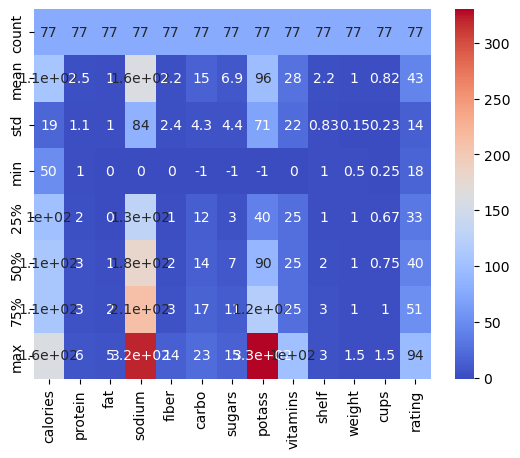

In [5]:
sns.heatmap(df.describe(),cmap='coolwarm',annot=True)

(array([[33., 33., 11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  3., 10., 58.,  6.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [11.,  1.,  5.,  3., 13., 13., 19.,  6.,  5.,  1.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [12., 21., 12., 16.,  5.,  4.,  2.,  2.,  1.,  2.],
        [71.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [18., 54.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([ -1. ,  32.1,  65.2,  98.3, 13

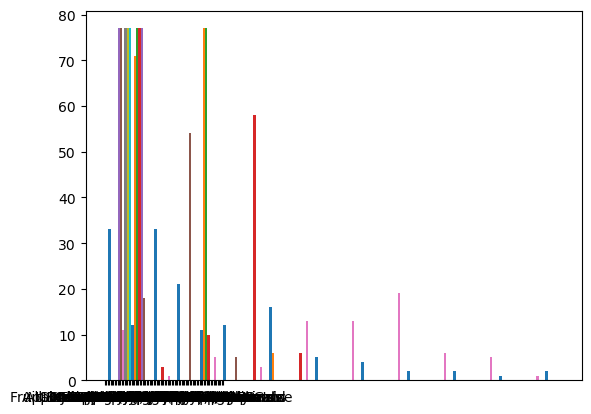

In [6]:
plt.hist(df)

(array([[51., 26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 8.,  0., 63.,  0.,  0.,  0.,  0.,  0.,  0.,  6.]]),
 array([ -1. ,   9.1,  19.2,  29.3,  39.4,  49.5,  59.6,  69.7,  79.8,
         89.9, 100. ]),
 <a list of 2 BarContainer objects>)

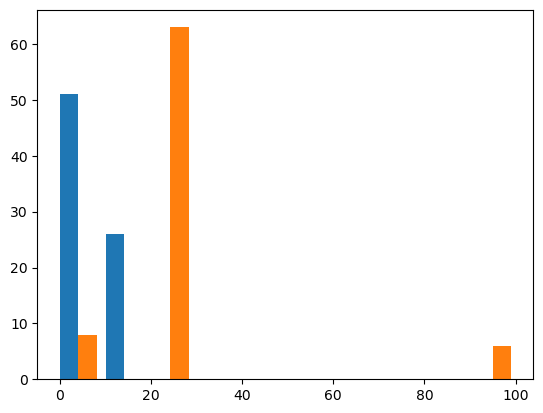

In [7]:
plt.hist([df.sugars,df.vitamins])

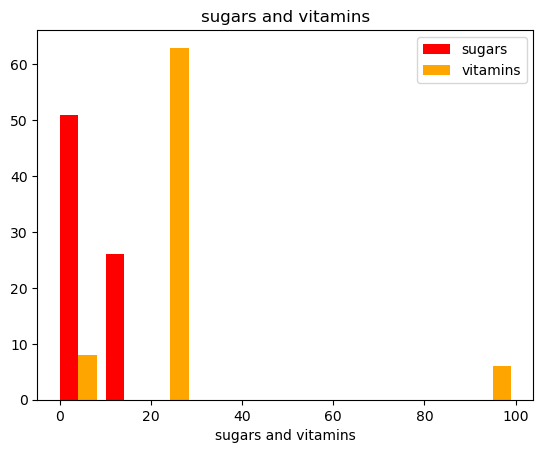

In [8]:
plt.hist([df["sugars"],df["vitamins"]],color=['red','orange'])
plt.title("sugars and vitamins")
plt.xlabel("sugars and vitamins")
plt.legend(["sugars" ,"vitamins"])

In [ ]:
 dict=
    {
    'N': 'Nabisco', 
    'Q': 'Quaker Oats', 
    'K': 'Kelloggs', 
    'R': 'Raslston Purina', 
    'G': 'General Mills' , 
    'P' :'Post' , 
    'A':'American Home Foods Products' 

}